In [ ]:
%matplotlib widget

import functools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Setting up a random number generator with a fixed state for reproducibility.
rng = np.random.default_rng(seed=19680801)
# Fixing bin edges.
HIST_BINS = np.linspace(-4, 4, 100)

# Histogram our data with numpy.
data = rng.standard_normal(1000)
n, _ = np.histogram(data, HIST_BINS)

def animate(frame_number, bar_container):
    # Simulate new data coming in.
    data = rng.standard_normal(1000)
    n, _ = np.histogram(data, HIST_BINS)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches


# Output generated via `matplotlib.animation.Animation.to_jshtml`.

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

anim = functools.partial(animate, bar_container=bar_container)
ani = animation.FuncAnimation(fig, anim, 50, repeat=True, blit=True)
plt.show()

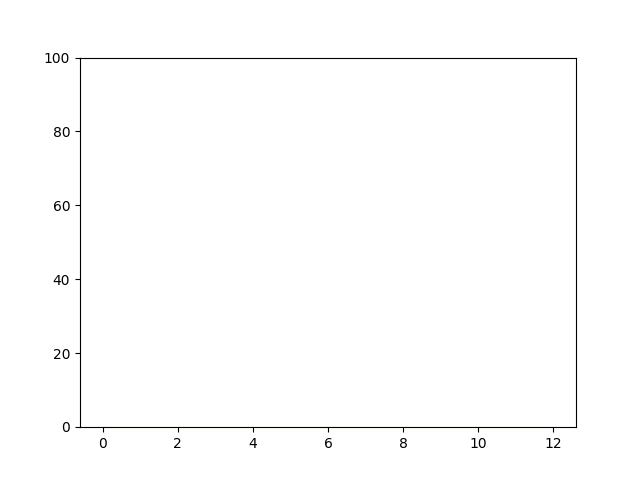

In [3]:
%matplotlib widget

import random
import functools

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

from sort_funcs import gen_bubble_sort

n = 12
hist_bins = list(range(n+1))  # edges = bins + 1
numbers = random.sample(population=list(range(20, 100)), k=n)

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=100)


def animate(bar_heights, bar_container):
    for h, patch in zip(bar_heights, bar_container.patches):
        patch.set_height(h)
    return bar_container.patches

func = functools.partial(animate, bar_container=bar_container)
func_animation = animation.FuncAnimation(fig=fig, func=func,            
                                         frames=gen_bubble_sort(numbers), 
                                         blit=True, cache_frame_data=False)  # to suppress warning

plt.show()

In [2]:
heights = [patch.get_height() for patch in bar_container.patches]
assert sorted(numbers) == heights